# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

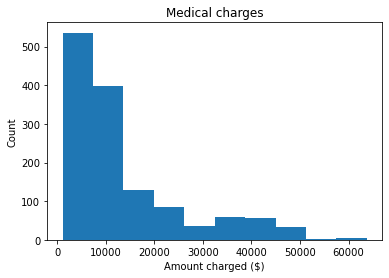

In [4]:
_ = plt.hist(medical.charges)
_ = plt.xlabel('Amount charged ($)')
_ = plt.ylabel('Count')
_ = plt.title('Medical charges')

In [5]:
medical_charges_mean = np.mean(medical.charges)
print("medical_charges_mean:", medical_charges_mean)
#13270.422265141257
medical_charges_std = np.std(medical.charges, ddof=1) #use ddof=1 cause random sample of larger population
print("medical_charges_std:", medical_charges_std)
#medical_charges_mean: 13270.422265141257
#medical_charges_std: 12110.011236693994
# These statistics show a right skew so have to be dealt with the idea that the sample might not be the ideal sample to 
# deal with as is

medical_charges_mean: 13270.422265141257
medical_charges_std: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [6]:
# The justification would be that the statistics would not provide a definite answer, but
# would determine a confidence level.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

The appropriate confidence interval in this case is a one-sided interval because there is only concern that the average charge is below a certain amount (12000).  There is no issue if the charge is larger than 12000.

In [7]:
#from scipy.stats import sem
#conf_interval_from_t = t.interval(alpha=0.95, df=len(medical.charges)-1, 
#                                  loc=np.mean(medical.charges), scale=sem(medical.charges))
#print(conf_interval_from_t)
df = len(medical.charges) - 1
p_for_1_tail = 0.95
t_for_confidence_level_95 = t.ppf(p_for_1_tail, df) # critical value
t_margin_of_error = t_for_confidence_level_95 * (medical_charges_std / np.sqrt(len(medical.charges)))
print(t_for_confidence_level_95, t_margin_of_error)
#1.1923264102757953

1.6459941145571317 544.9350813250251


In [8]:
lower_of_confidence_interval = medical_charges_mean - t_margin_of_error
print(lower_of_confidence_interval)
# 12725.48718381623
# The administrator should not be concerned, because the confidence interval has a low of about 12725, which is above the 
# 12000 minimum needed

12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

We are assuming they have the same variance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

The null hypothesis is that those with and without insurance, on average, pay the same amount.  The alternative hypothesis is that they do not. 

In [9]:
charges_no_insurance = medical.charges[medical.insuranceclaim == 0]
charges_has_insurance = medical.charges[medical.insuranceclaim == 1]

In [10]:
charges_no_len = len(charges_no_insurance)
charges_has_len = len(charges_has_insurance)
print("charges no, has len: ", charges_no_len, charges_has_len)
charges_no_mean = np.mean(charges_no_insurance)
charges_has_mean = np.mean(charges_has_insurance)
print("charges no, has mean: ", charges_no_mean, charges_has_mean)
charges_no_std = np.std(charges_no_insurance, ddof=1)
charges_has_std = np.std(charges_has_insurance, ddof=1)
print("charges no, has std: ", charges_no_std, charges_has_std)
charges_no_inv_len = 1 / charges_no_len
charges_has_inv_len = 1 / charges_has_len
print("charges no, has inv len: ", charges_no_inv_len, charges_has_inv_len)
#charges no, has len:  555 783
#charges no, has mean:  8821.421892306294 16423.928276537663
#charges no, has std:  6446.510126811736 14045.928418802127
#charges no, has inv len:  0.0018018018018018018 0.001277139208173691

charges no, has len:  555 783
charges no, has mean:  8821.421892306294 16423.928276537663
charges no, has std:  6446.510126811736 14045.928418802127
charges no, has inv len:  0.0018018018018018018 0.001277139208173691


In [11]:
pooled_numerator = ((charges_no_len - 1) * (charges_no_std ** 2)) + ((charges_has_len - 1) * (charges_has_std ** 2))
pooled_df = charges_has_len + charges_no_len - 2
pooled_std = np.sqrt(pooled_numerator / pooled_df)
print("pooled_std: ", pooled_std)
#pooled_std:  11520.034268775256

pooled_std:  11520.034268775256


In [12]:
t_stat_numerator = charges_no_mean - charges_has_mean
t_stat_denominator = pooled_std * (np.sqrt (charges_has_inv_len + charges_no_inv_len))
t_stat = t_stat_numerator / t_stat_denominator
#p-value = P(TS ts | H 0 is true) = 1 - cdf(ts)
p_value = 2 * t.cdf(t_stat, df=pooled_df)
print("t_stat, pvalue: ", t_stat, p_value)
#t_stat, pvalue:  -11.89329903087671 4.461230231620972e-31
# The p-value is very small, indicating the null hypothesis is not true.  This indicates that there is a difference 
# between what people with and without insurance pay.

t_stat, pvalue:  -11.89329903087671 4.461230231620972e-31


In [13]:
# scipy function to calculate to perform a t-test on two independent samples
from scipy import stats
stats.ttest_ind_from_stats(mean1=charges_no_mean, std1=charges_no_std, nobs1=charges_no_len,
                     mean2=charges_has_mean, std2=charges_has_std, nobs2=charges_has_len)
#Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  

There were no z-tests I found among the functions listed in the scipy documentation. (There was one in another library though:
statsmodels.stats.weightstats.ztest).  However, a z-test could not be used with a sample such as was in this exercise. Take z-test as defined in investopedia:
"A z-test is a statistical test used to determine whether two population means are different when the variances are known and the sample size is large. The test statistic is assumed to have a normal distribution, and nuisance parameters such as standard deviation should be known in order for an accurate z-test to be performed." 
Our sample, at minimum, did not have a normal distribution and probably was a small sample in context with what full population.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test